# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 ProductId](#3.5.1_ProductId)
    * [3.5.2 ProfileName](#3.5.2_ProfileName)
    * [3.5.3 Score](#3.5.3_Score)
    * [3.5.4 ReviewTime](#3.5.4_ReviewTime)
    * [3.5.5 Duplicate UserID, ProductId, and ReviewTime](#3.5.5_Duplicate)
      * [3.5.5.1 Reviews associated with 'christopher hayes](#3.5.5.1_Reviews)
      * [3.4.5.2 Potantial spam profiles](#3.5.5.2_spamprofiles)
      * [3.4.5.3 Label spam profiles](#3.5.5.3_Label)
      * [3.4.5.4 Scores associated with potantial spam profiles](#3.5.5.4_Scores)
      * [3.4.5.5 Summary associated with potantial spam profiles](#3.5.5.5_Summary)
      * [3.4.5.6 Reviews associated with potantial spam profiles](#3.5.5.6_Profiles)
      * [3.4.5.7 Word Cloud of Review Text](#3.5.5.7_Word)
      * [3.4.5.8 Sentiment Analysis - Potential Spam](#3.5.5.8_Sentiment)
      * [3.4.5.9 Analysis of Review Length and Score](#3.5.5.9_Length)
      * [3.4.510 Most Common Words](#3.5.5.10_Most)
  * [3.6 Duplicate Records](#3.6_Duplicate_Values)
  * [3.7 Missing Values](#3.7_MissingValues)
  * [3.8 Basic Text Statistics](#3.8_Statistics)
  * [3.9 Word Cloud of Review Text](#3.9_Cloud)
  * [3.10 Sentiment Analysis](#3.10_SentimentAnalysis)
  * [3.11 Analysis of Review Length and Score](#3.11_ReviewLength)
  * [3.12 N-grams Analysis](#3.12_N_grams)
  * [3.13 Most Common Words](#3.13_N_MostCommonWords)
  * [3.14 Saving the Cleaned Data](#3.14_Save)
  * [3.15 Summary](#3.15_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

This notebook provides a comprehensive exploratory data analysis (EDA) of the Amazon Fine Food Reviews dataset. The analysis aims to uncover key patterns and insights that reflect customer sentiment and preferences regarding fine food products on Amazon. By examining various features such as review text, ratings, helpfulness scores, and reviewer profiles, this notebook helps understand the factors that influence customer reviews. The goal is to leverage this data to provide actionable insights into customer behavior and improve product offerings and customer service strategies.

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
import nltk

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [2]:
amazon_data = pd.read_csv("amazon_data_wrangling.csv")
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewTime,CleanedText,CleanedSummary,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary,StemmedSummary,StemmedText
0,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,0.0,2010-03-10,having tried a couple of other brands of glute...,crunchy good glutenfree sandwich cookies,"['tried', 'couple', 'brands', 'glutenfree', 's...","['crunchy', 'good', 'glutenfree', 'sandwich', ...","['tried', 'couple', 'brand', 'glutenfree', 'sa...","['crunchy', 'good', 'glutenfree', 'sandwich', ...",crunchi & good gluten-fre sandwich cooki !,have tri a coupl of other brand of gluten-fre ...
1,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,0.0,2011-03-01,my cat loves these treats if ever i cant find ...,great kitty treats,"['cat', 'loves', 'treats', 'ever', 'cant', 'fi...","['great', 'kitty', 'treats']","['cat', 'love', 'treat', 'ever', 'cant', 'find...","['great', 'kitty', 'treat']",great kitti treat,my cat love these treat . if ever i ca n't fin...
2,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,0.0,2008-10-15,a little less than i expected it tends to hav...,coffee taste,"['little', 'less', 'expected', 'tends', 'muddy...","['coffee', 'taste']","['little', 'le', 'expected', 'tends', 'muddy',...","['coffee', 'taste']",coffe tast,a littl less than i expect . it tend to have a...
3,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",0.0,2012-04-25,first there was frosted miniwheats in original...,so the miniwheats were too big,"['first', 'frosted', 'miniwheats', 'original',...","['miniwheats', 'big']","['first', 'frosted', 'miniwheats', 'original',...","['miniwheats', 'big']",so the mini-wheat were too big ?,"first there wa frost mini-wheat , in origin si..."
4,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,0.0,2012-04-18,and i want to congratulate the graphic artist ...,great taste,"['want', 'congratulate', 'graphic', 'artist', ...","['great', 'taste']","['want', 'congratulate', 'graphic', 'artist', ...","['great', 'taste']",great tast . . .,and i want to congratul the graphic artist for...


In [3]:
# Check the shape of the DataFrame
print(amazon_data.shape)

(100000, 20)


In [4]:
# Summary of the DataFrame
print(amazon_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      100000 non-null  int64  
 1   ProductId               100000 non-null  object 
 2   UserId                  100000 non-null  object 
 3   ProfileName             100000 non-null  object 
 4   HelpfulnessNumerator    100000 non-null  int64  
 5   HelpfulnessDenominator  100000 non-null  int64  
 6   Score                   100000 non-null  int64  
 7   Time                    100000 non-null  int64  
 8   Summary                 99991 non-null   object 
 9   Text                    100000 non-null  object 
 10  HelpfulnessRatio        100000 non-null  float64
 11  ReviewTime              100000 non-null  object 
 12  CleanedText             100000 non-null  object 
 13  CleanedSummary          99954 non-null   object 
 14  TokenizedText        

In [5]:
# Check for missing values
missing_values = amazon_data.isnull().sum()
print(missing_values)

Id                         0
ProductId                  0
UserId                     0
ProfileName                0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    9
Text                       0
HelpfulnessRatio           0
ReviewTime                 0
CleanedText                0
CleanedSummary            46
TokenizedText              0
TokenizedSummary           0
LemmatizedText             0
LemmatizedSummary          0
StemmedSummary             9
StemmedText                0
dtype: int64


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 ProductId<a id='3.5.1_ProductId'></a>

In [6]:
amazon_data.ProductId.value_counts(ascending=False)

B007JFMH8M    163
B003B3OOPA    133
B0026RQTGE    131
B002QWHJOU    125
B005K4Q37A    114
             ... 
B002PHOHZ0      1
B002DVPTVO      1
B002I6DZ92      1
B004UAYXJK      1
B000NU3ZYU      1
Name: ProductId, Length: 31698, dtype: int64

In [7]:
amazon_data[amazon_data['ProductId'] == 'B007JFMH8M'].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewTime,CleanedText,CleanedSummary,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary,StemmedSummary,StemmedText
148,563829,B007JFMH8M,A3BD20DGXAO0XN,Shawn,0,0,5,1341792000,Yummy!,These cookies are delicious! So soft and flavo...,0.0,2012-07-09,these cookies are delicious so soft and flavor...,yummy,"['cookies', 'delicious', 'soft', 'flavorful', ...",['yummy'],"['cooky', 'delicious', 'soft', 'flavorful', 'f...",['yummy'],yummi !,these cooki are delici ! so soft and flavor . ...
521,563396,B007JFMH8M,A2ZGAYM73QA32R,Mindy.shay,0,0,5,1341964800,Yummy cookie,This cookie is so soft and taste amazing! I wa...,0.0,2012-07-11,this cookie is so soft and taste amazing i was...,yummy cookie,"['cookie', 'soft', 'taste', 'amazing', 'surpri...","['yummy', 'cookie']","['cookie', 'soft', 'taste', 'amazing', 'surpri...","['yummy', 'cookie']",yummi cooki,thi cooki is so soft and tast amaz ! i wa so s...
1129,563510,B007JFMH8M,A3BFCHN39OF5XL,Rob & Holly,0,0,4,1341878400,loved the cookie just not the flavor,I loved the softness of this cookie but not to...,0.0,2012-07-10,i loved the softness of this cookie but not to...,loved the cookie just not the flavor,"['loved', 'softness', 'cookie', 'keen', 'oatme...","['loved', 'cookie', 'flavor']","['loved', 'softness', 'cookie', 'keen', 'oatme...","['loved', 'cookie', 'flavor']",love the cooki just not the flavor,i love the soft of thi cooki but not to keen o...
1902,563073,B007JFMH8M,A1NM2P8DXA5SME,confessions209,3,3,4,1342396800,Great store bought cookie,I was pleasently surprised about how soft this...,1.0,2012-07-16,i was pleasently surprised about how soft this...,great store bought cookie,"['pleasently', 'surprised', 'soft', 'cookie', ...","['great', 'store', 'bought', 'cookie']","['pleasently', 'surprised', 'soft', 'cookie', ...","['great', 'store', 'bought', 'cookie']",great store bought cooki,i wa pleasent surpris about how soft thi cooki...
2101,563044,B007JFMH8M,A1CKSRF05IVVHW,jenjenlv,0,0,3,1343174400,Love it!,It's not too sweet so I like that. The kids lo...,0.0,2012-07-25,its not too sweet so i like that the kids love...,love it,"['sweet', 'like', 'kids', 'love', 'lets', 'fac...",['love'],"['sweet', 'like', 'kid', 'love', 'let', 'face'...",['love'],love it !,it 's not too sweet so i like that . the kid l...


In [8]:
# Filtering the dataset for the specific ProductId and computing the median of the 'Score' column
median_score = amazon_data[amazon_data['ProductId'] == 'B007JFMH8M']['Score'].median()
print(median_score)

5.0


The most frequently purchased product associated with 'Cookie' has achieved a median score of 5.

In [9]:
amazon_data[amazon_data['ProductId'] == 'B003B3OOPA'].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewTime,CleanedText,CleanedSummary,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary,StemmedSummary,StemmedText
19,368062,B003B3OOPA,A3LBK3TI89AT4C,Tinpenny,0,1,5,1328486400,Coconut,I bought this for my 73 year old dad he had se...,0.0,2012-02-06,i bought this for my year old dad he had seen...,coconut,"['bought', 'year', 'old', 'dad', 'seen', 'comm...",['coconut'],"['bought', 'year', 'old', 'dad', 'seen', 'comm...",['coconut'],coconut,i bought thi for my 73 year old dad he had see...
309,367754,B003B3OOPA,A1OF61ZUIODK4,heatcoe1427,1,1,5,1334793600,"Love, love, love.....","I love, love, love this product. The other coc...",1.0,2012-04-19,i love love love this product the other coconu...,love love love,"['love', 'love', 'love', 'product', 'coconut',...","['love', 'love', 'love']","['love', 'love', 'love', 'product', 'coconut',...","['love', 'love', 'love']","love , love , love .....","i love , love , love thi product . the other c..."
2146,367875,B003B3OOPA,A3R6GBRMIWXON8,"John H. Lund ""Didgitizer""",0,0,5,1349568000,Pain free,I have been using coconut oil for over a year ...,0.0,2012-10-07,i have been using coconut oil for over a year ...,pain free,"['using', 'coconut', 'oil', 'year', 'used', 'c...","['pain', 'free']","['using', 'coconut', 'oil', 'year', 'used', 'c...","['pain', 'free']",pain free,i have been use coconut oil for over a year no...
4206,368047,B003B3OOPA,A3HZYG38DYV8IF,beauty maven,1,2,4,1314921600,the oil is good....,"love the oil. but i hate the jar, whenever i t...",0.5,2011-09-02,love the oil but i hate the jar whenever i try...,the oil is good,"['love', 'oil', 'hate', 'jar', 'whenever', 'tr...","['oil', 'good']","['love', 'oil', 'hate', 'jar', 'whenever', 'tr...","['oil', 'good']",the oil is good ....,"love the oil . but i hate the jar , whenev i t..."
6193,367750,B003B3OOPA,A2K9O90NDDKYHF,Love&Light,1,1,5,1336089600,Divine,This Coconut Oil product is nothing short of a...,1.0,2012-05-04,this coconut oil product is nothing short of a...,divine,"['coconut', 'oil', 'product', 'nothing', 'shor...",['divine'],"['coconut', 'oil', 'product', 'nothing', 'shor...",['divine'],divin,thi coconut oil product is noth short of amaz ...


In [10]:
# Filtering the dataset for the specific ProductId and computing the median of the 'Score' column
median_score = amazon_data[amazon_data['ProductId'] == 'B003B3OOPA']['Score'].median()
print(median_score)

5.0


The second most frequently purchased product associated with 'Coconut Oil' has achieved a median score of 5.

In [11]:
amazon_data[amazon_data['ProductId'] == 'B002QWHJOU'].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewTime,CleanedText,CleanedSummary,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary,StemmedSummary,StemmedText
1430,329557,B002QWHJOU,AHD1NIMHE5F4D,Alycat's,0,0,5,1341792000,Greenies,Thank you so much for sending us this product ...,0.0,2012-07-09,thank you so much for sending us this product ...,greenies,"['thank', 'much', 'sending', 'us', 'product', ...",['greenies'],"['thank', 'much', 'sending', 'u', 'product', '...",['greenies'],greeni,thank you so much for send us thi product that...
1566,329911,B002QWHJOU,A5SBS03UTEE0C,P. Blakely,0,0,5,1265932800,Highly Recommended,I ordered these on sale on the evening of 02/0...,0.0,2010-02-12,i ordered these on sale on the evening of usu...,highly recommended,"['ordered', 'sale', 'evening', 'ususlly', 'ite...","['highly', 'recommended']","['ordered', 'sale', 'evening', 'ususlly', 'ite...","['highly', 'recommended']",highli recommend,i order these on sale on the even of 02/08/10 ...
2846,329608,B002QWHJOU,AEV9O865SEL8J,e_b08,0,0,4,1333929600,Great Product,"My pug loves his ""Toothbrushes."" THey help ke...",0.0,2012-04-09,my pug loves his toothbrushes they help keep ...,great product,"['pug', 'loves', 'toothbrushes', 'help', 'keep...","['great', 'product']","['pug', 'love', 'toothbrush', 'help', 'keep', ...","['great', 'product']",great product,my pug love hi `` toothbrush . '' they help ke...
3175,329539,B002QWHJOU,AT66IKVKXSI46,Travis Greene,0,0,5,1344211200,Great product,"My boxer likes these, but he doesn't get reall...",0.0,2012-08-06,my boxer likes these but he doesnt get really ...,great product,"['boxer', 'likes', 'doesnt', 'get', 'really', ...","['great', 'product']","['boxer', 'like', 'doesnt', 'get', 'really', '...","['great', 'product']",great product,"my boxer like these , but he doe n't get reall..."
4880,329955,B002QWHJOU,A2RZUAFCLKAOLQ,theresa a velazquez,2,2,5,1324339200,brandi,my dog brandi lovessssssssssssssssssss these g...,1.0,2011-12-20,my dog brandi lovessssssssssssssssssss these g...,brandi,"['dog', 'brandi', 'lovessssssssssssssssssss', ...",['brandi'],"['dog', 'brandi', 'love', 'greenies', 'cant', ...",['brandi'],brandi,my dog brandi lovessssssssssssssssssss these g...


In [12]:
# Filtering the dataset for the specific ProductId and computing the median of the 'Score' column
median_score = amazon_data[amazon_data['ProductId'] == 'B002QWHJOU']['Score'].median()
print(median_score)

5.0


The third most frequently purchased product associated with 'Greenies dog food' has achieved a median score of 5.

### 3.5.2 ProfileName<a id='3.5.2_ProfileName'></a>

In [13]:
amazon_data.ProfileName.value_counts(ascending=False)

O. Brown "Ms. O. Khannah-Brown"           83
Gary Peterson                             72
C. F. Hill "CFH"                          71
Rebecca of Amazon "The Rebecca Review"    66
Chris                                     66
                                          ..
southwester                                1
Dr. Z. "Dr. Z"                             1
A. Ramson                                  1
thompotto                                  1
Sharon Brubaker                            1
Name: ProfileName, Length: 64663, dtype: int64

Here is the list of customers with the most reviews: C. F. Hill ("CFH"), O. Brown ("Ms. O. Khannah-Brown"), Gary Peterson, Rebecca of Amazon ("The Rebecca Review"), and Chris.

## 3.5.3 Score<a id='3.5.3_Score'></a>

In [14]:
amazon_data.Score.value_counts(ascending=False)

5    64152
4    14111
1     9112
3     7422
2     5203
Name: Score, dtype: int64

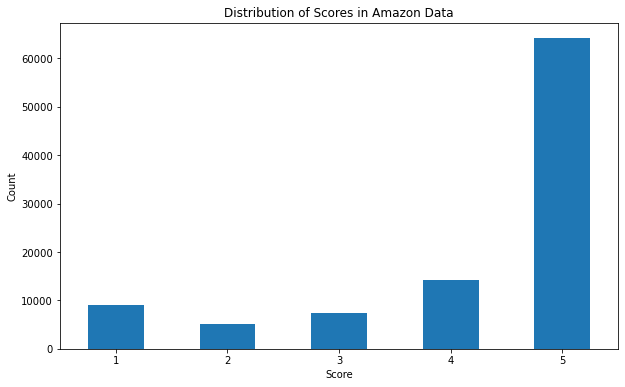

In [15]:
# Calculate the value counts for the 'Score' column
score_counts = amazon_data['Score'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.title('Distribution of Scores in Amazon Data')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The bar chart illustrates the distribution of scores in the Amazon Fine Food Reviews dataset, showing a majority of high ratings with most reviews scoring 5, indicating overall customer satisfaction. Lower scores are significantly less frequent, highlighting that a smaller proportion of customers are dissatisfied.

## 3.5.4 ReviewTime<a id='3.5.4_ReviewTime'></a>

In [16]:
amazon_data.ReviewTime.value_counts(ascending=False)

2012-10-16    206
2012-09-06    187
2011-11-25    185
2012-08-16    181
2012-08-06    177
             ... 
2006-07-28      1
2003-07-02      1
2006-01-19      1
2004-05-10      1
2005-08-09      1
Name: ReviewTime, Length: 2699, dtype: int64

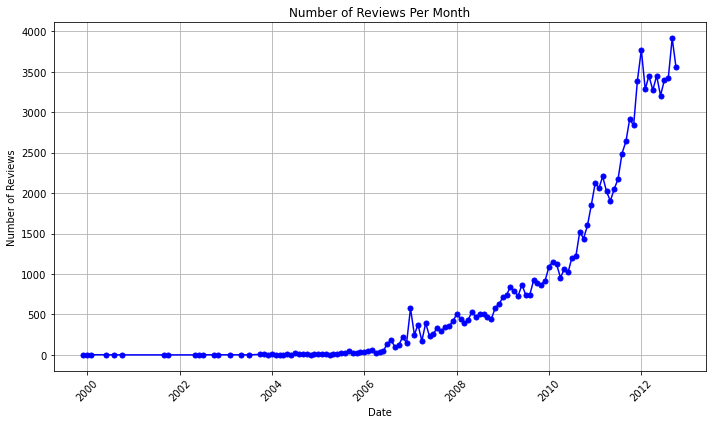

In [17]:
# Ensure the 'ReviewTime' column is in datetime format
amazon_data['ReviewTime'] = pd.to_datetime(amazon_data['Time'], unit='s')

# Group the data by month and count the number of reviews per month
review_counts_monthly = amazon_data.groupby(amazon_data['ReviewTime'].dt.to_period('M')).size()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(review_counts_monthly.index.to_timestamp(), review_counts_monthly.values, marker='o', color='b', markersize=5)
plt.title('Number of Reviews Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


This chart illustrates the number of reviews per month over time, from around 2000 to 2012. The x-axis represents the date, while the y-axis represents the number of reviews. Notably, there is a significant upward trend, particularly after 2006, indicating a rapid increase in the volume of reviews. This trend suggests that the review activity grew substantially during this period, likely due to the increasing popularity and user base of the platform. 

### 3.5.5 Duplicate UserID, ProductId, and ReviewTime<a id='3.5.5_Duplicate'></a>

In [18]:
# Ensure the 'ReviewTime' column is in datetime format
amazon_data['ReviewTime'] = pd.to_datetime(amazon_data['Time'], unit='s')

# Group by 'ProductId', 'ProfileName', and 'ReviewTime', then count the number of reviews for each user for each product on each day
user_product_day_review_counts = amazon_data.groupby(['ProductId', 'ProfileName', amazon_data['ReviewTime'].dt.date]).size().reset_index(name='ReviewCount')

# Identify the user who wrote the most reviews for each product on each day
top_user_per_product_day = user_product_day_review_counts.loc[user_product_day_review_counts.groupby(['ProductId', 'ReviewTime'])['ReviewCount'].idxmax()]

# Order the result based on ReviewCount in descending order
top_user_per_product_day_sorted = top_user_per_product_day.sort_values(by='ReviewCount', ascending=False)

# Print the result
print(top_user_per_product_day_sorted[top_user_per_product_day_sorted['ReviewCount'] > 2 ])

        ProductId                ProfileName  ReviewTime  ReviewCount
71649  B003MWBFXY          christopher hayes  2010-12-04            4
74384  B003WK0D8O          christopher hayes  2010-12-04            4
55187  B001VIYCK4          christopher hayes  2010-12-04            4
39517  B001BCVY4W  Wendy Johnston "podlogic"  2009-02-06            3
27917  B000QSN7P6          christopher hayes  2010-12-04            3
71639  B003MWBFMK          christopher hayes  2010-12-04            3
99704  B009GHI5Q4          christopher hayes  2010-12-04            3
58134  B0029NVJ4M                      annie  2011-08-25            3
17471  B000FYYOYO   Nicholas Walker "Savage"  2010-11-19            3
31623  B000WFU8O6                       HTBK  2010-07-04            3
70294  B003G0APGK                   CatWoman  2010-08-15            3
99616  B009B87SAC          christopher hayes  2010-12-04            3


This result is useful for analyzing review patterns, identifying potential duplicate reviews, and understanding user behavior over time. The repeated reviews on the same day by the same user could indicate **spam or fraudulent activity**, which is critical for ensuring data quality and integrity in further analysis. For example, "christopher hayes" provided 4 reviews for several products (such as 'B003MWBFXY', 'B003WK0D8O', and 'B001VIYCK4') on the same day.

#### 3.5.5.1 Reviews associated with 'christopher hayes' <a id='3.5.5.1_Reviews'></a>

In [19]:
amazon_data[amazon_data['ProfileName'] ==  "christopher hayes"]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewTime,CleanedText,CleanedSummary,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary,StemmedSummary,StemmedText
8142,52510,B003ANFMY8,A3TVZM3ZIXG8YW,christopher hayes,7,9,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ...",0.777778,2010-12-04,this review will make me sound really stupid b...,filler food is empty leaves your cat always ne...,"['review', 'make', 'sound', 'really', 'stupid'...","['filler', 'food', 'empty', 'leaves', 'cat', '...","['review', 'make', 'sound', 'really', 'stupid'...","['filler', 'food', 'empty', 'leaf', 'cat', 'al...","filler food is empti , leav your cat alway nee...","thi review will make me sound realli stupid , ..."
9475,247122,B003M5TG28,A3TVZM3ZIXG8YW,christopher hayes,6,14,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ...",0.428571,2010-12-04,this review will make me sound really stupid b...,filler food is empty leaves your cat always ne...,"['review', 'make', 'sound', 'really', 'stupid'...","['filler', 'food', 'empty', 'leaves', 'cat', '...","['review', 'make', 'sound', 'really', 'stupid'...","['filler', 'food', 'empty', 'leaf', 'cat', 'al...","filler food is empti , leav your cat alway nee...","thi review will make me sound realli stupid , ..."
12647,387236,B001VIYCK4,A3TVZM3ZIXG8YW,christopher hayes,33,48,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ...",0.687500,2010-12-04,this review will make me sound really stupid b...,filler food is empty leaves your cat always ne...,"['review', 'make', 'sound', 'really', 'stupid'...","['filler', 'food', 'empty', 'leaves', 'cat', '...","['review', 'make', 'sound', 'really', 'stupid'...","['filler', 'food', 'empty', 'leaf', 'cat', 'al...","filler food is empti , leav your cat alway nee...","thi review will make me sound realli stupid , ..."
13889,429238,B003MWBFMK,A3TVZM3ZIXG8YW,christopher hayes,3,3,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ...",1.000000,2010-12-04,this review will make me sound really stupid b...,filler food is empty leaves your cat always ne...,"['review', 'make', 'sound', 'really', 'stupid'...","['filler', 'food', 'empty', 'leaves', 'cat', '...","['review', 'make', 'sound', 'really', 'stupid'...","['filler', 'food', 'empty', 'leaf', 'cat', 'al...","filler food is empti , leav your cat alway nee...","thi review will make me sound realli stupid , ..."
14014,318785,B003MW7858,A3TVZM3ZIXG8YW,christopher hayes,19,21,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ...",0.904762,2010-12-04,this review will make me sound really stupid b...,filler food is empty leaves your cat always ne...,"['review', 'make', 'sound', 'really', 'stupid'...","['filler', 'food', 'empty', 'leaves', 'cat', '...","['review', 'make', 'sound', 'really', 'stupid'...","['filler', 'food', 'empty', 'leaf', 'cat', 'al...","filler food is empti , leav your cat alway nee...","thi review will make me sound realli stupid , ..."
15683,499917,B009B87SAC,A3TVZM3ZIXG8YW,christopher hayes,6,14,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ...",0.428571,2010-12-04,this review will make me sound really stupid b...,filler food is empty leaves your cat always ne...,"['review', 'make', 'sound', 'really', 'stupid'...","['filler', 'food', 'empty', 'leaves', 'cat', '...","['review', 'make', 'sound', 'really', 'stupid'...","['filler', 'food', 'empty', 'leaf', 'cat', 'al...","filler food is empti , leav your cat alway nee...","thi review will make me sound realli stupid , ..."
15815,149949,B003M60K54,A3TVZM3ZIXG8YW,christopher hayes,3,3,1,1291420800,"Filler food is 

In [20]:
amazon_data[amazon_data['ProfileName'] ==  "christopher hayes"].shape

(39, 20)

It appears that the profile associated with **'Christopher Hayes'** has provided 39 reviews, all with a score of 1, for various 'cat food' products on December 4, 2010.

#### 3.4.5.2 Potantial spam profiles<a id='3.5.5.2_spamprofiles'></a>

In [21]:
# Assuming top_user_per_product_day_sorted is already defined and sorted as per the previous steps
top_user_profiles = top_user_per_product_day_sorted[top_user_per_product_day_sorted['ReviewCount'] > 2 ]['ProfileName'].unique()

# Print the results
top_user_profiles

array(['christopher hayes', 'Wendy Johnston "podlogic"', 'annie',
       'Nicholas Walker "Savage"', 'HTBK', 'CatWoman'], dtype=object)

In [22]:
top_user_profiles.shape

(6,)

The code identifies top user profiles who have written more than two reviews in a single day for the same product. This filtering helps in recognizing highly active users who may **potentially be providing fake feedback**. The resulting list of profile names can be further analyzed to evaluate their review patterns, thereby ensuring the integrity and quality of the dataset.

#### 3.4.5.3 Label spam profiles<a id='3.5.5.3_Label'></a>

In [23]:
# Label spam records
amazon_data['FakeReviews'] = amazon_data[amazon_data['ProfileName'].isin(top_user_profiles)]['ProfileName'].apply(lambda x: 1 if x in top_user_profiles else 0)

# Assuming amazon_data is your DataFrame
amazon_data['FakeReviews'] = amazon_data['FakeReviews'].fillna(0)

amazon_data['FakeReviews'].value_counts()

0.0    99908
1.0       92
Name: FakeReviews, dtype: int64

In [24]:
percentage_fake_reviews = 100 * (amazon_data['FakeReviews'].sum())  / len(amazon_data)
print(f"Percentage of fake reviews: {percentage_fake_reviews:.2f}%")

Percentage of fake reviews: 0.09%


In [25]:
ProfileNames = ['HTBK', 'christopher hayes', 'Paul Moskowitz',
       'N. Ferguson "Two, Daisy, Hannah, and Kitten"',
       'Nicholas Walker "Savage"', 'J. Hollister "Judy says"',
       'Joe MacBu', 'Bballdude733', 'busybakers', 'FL Mom', 'Doctor D',
       'Wendy Johnston "podlogic"', 'Melissa-Kae Leacock',
       'B.O.B  AOJN "would be gourmet"', 'CatWoman',
       'Shana "That\'s my opinion- I could be wrong!"', 'Basil Nestor',
       'A. Winters "Be good humans."', 'ARA', 'A. Smith', 'Mark Bodzin',
       'Zefran', 'Sandy "WR Gma"', 'mom of 2', 'GMG "GMG"', 'Orlando Mom']

# Use .isin() to filter the DataFrame based on the ProfileNames list
products = amazon_data[amazon_data['ProfileName'].isin(ProfileNames)]['ProductId'].unique()

# Print the scores
print(products)

['B000FPM2NS' 'B000LKXQCS' 'B001M09BTS' '7310172001' 'B00181Y1PU'
 'B0016FY6H6' 'B000WFRQQ4' 'B000MXEN9O' 'B000WFORH0' 'B0030VJ8E0'
 'B003VQJTBG' 'B001BCVY9W' 'B003ANFMY8' 'B002OFZIV0' 'B0002DGRZC'
 'B000WFN0VO' 'B003M5TG28' 'B001EO5SCQ' 'B000WFEN74' 'B003B3OOPA'
 'B001VIYCK4' 'B0029NM8KQ' 'B003MWBFMK' 'B003MW7858' 'B0002H3RFG'
 'B001BDDTB2' 'B001BDDT8K' 'B0002Z9BF8' 'B0002DGRRA' 'B0002I0GVI'
 'B00074W3C2' 'B009B87SAC' 'B003M60K54' 'B000LKVRVA' 'B003WK0D8O'
 'B0002DGRQ6' 'B003VMBVQ6' 'B001AF7S0Y' 'B0002DGRSY' 'B000FYYOYO'
 'B006Q7YFLQ' 'B001ULH7P4' 'B005VOONGM' 'B001B02JF2' 'B0018KLPFK'
 'B009GHI5Q4' 'B0029NIPSA' 'B005VOOM5E' 'B0031UBWLM' 'B002YFZ7IY'
 'B0029NIOYU' 'B001QX2IH8' 'B0027MIP9C' 'B003G0APGK' 'B0038M4DZ0'
 'B001E5DZJS' 'B001G7QG5O' 'B000LKZK36' 'B001VIY8BW' 'B000ES5GMU'
 'B000W5U5H6' 'B0030VBRCG' 'B000FL3ILM' 'B0030VJ97Q' 'B000JMDJ5C'
 'B000ETVRQS' 'B003MZH8PK' 'B0030VBPN2' 'B009GHI6I6' 'B0006345PW'
 'B0038C6X8A' 'B002ANCEI6' 'B0016FRI8A' 'B0031U9UZC' 'B000CMFVY6'
 'B0002XAF

These product IDs are associated with profiles that exhibited unusual review patterns, such as writing multiple reviews for the same product on a single day or giving uniformly high scores across different products. Many of these products appear to fall under the same category, potentially 'Cat food', suggesting coordinated review manipulation.

In [26]:
# Assuming top_user_per_product_day_sorted is already defined and sorted as per the previous steps
top_Product_profiles = top_user_per_product_day_sorted[top_user_per_product_day_sorted['ReviewCount'] > 2 ]['ProductId'].unique()

# Print the results
top_Product_profiles

array(['B003MWBFXY', 'B003WK0D8O', 'B001VIYCK4', 'B001BCVY4W',
       'B000QSN7P6', 'B003MWBFMK', 'B009GHI5Q4', 'B0029NVJ4M',
       'B000FYYOYO', 'B000WFU8O6', 'B003G0APGK', 'B009B87SAC'],
      dtype=object)

In [27]:
# Print the results
top_Product_profiles.shape

(12,)

The result lists product IDs that are associated with users who have written an unusually high number of reviews in a single day. This behavior may indicate **potential fake reviews**, which can be further investigated to maintain the integrity and quality of the dataset.

#### 3.4.5.4 Scores associated with potantial spam profiles<a id='3.5.5.4_Scores'></a>

In [28]:
ProfileNames = ['HTBK', 'christopher hayes', 'Paul Moskowitz',
       'N. Ferguson "Two, Daisy, Hannah, and Kitten"',
       'Nicholas Walker "Savage"', 'J. Hollister "Judy says"',
       'Joe MacBu', 'Bballdude733', 'busybakers', 'FL Mom', 'Doctor D',
       'Wendy Johnston "podlogic"', 'Melissa-Kae Leacock',
       'B.O.B  AOJN "would be gourmet"', 'CatWoman',
       'Shana "That\'s my opinion- I could be wrong!"', 'Basil Nestor',
       'A. Winters "Be good humans."', 'ARA', 'A. Smith', 'Mark Bodzin',
       'Zefran', 'Sandy "WR Gma"', 'mom of 2', 'GMG "GMG"', 'Orlando Mom']

# Use .isin() to filter the DataFrame based on the ProfileNames list
scores = amazon_data[amazon_data['ProfileName'].isin(ProfileNames)]['Score']

# Print the scores
print(scores.value_counts())

5    119
1     54
4     28
3     13
2      3
Name: Score, dtype: int64


In [29]:
ProfileNames = ['HTBK', 'christopher hayes', 'Paul Moskowitz',
       'N. Ferguson "Two, Daisy, Hannah, and Kitten"',
       'Nicholas Walker "Savage"', 'J. Hollister "Judy says"',
       'Joe MacBu', 'Bballdude733', 'busybakers', 'FL Mom', 'Doctor D',
       'Wendy Johnston "podlogic"', 'Melissa-Kae Leacock',
       'B.O.B  AOJN "would be gourmet"', 'CatWoman',
       'Shana "That\'s my opinion- I could be wrong!"', 'Basil Nestor',
       'A. Winters "Be good humans."', 'ARA', 'A. Smith', 'Mark Bodzin',
       'Zefran', 'Sandy "WR Gma"', 'mom of 2', 'GMG "GMG"', 'Orlando Mom']

# Use .isin() to filter the DataFrame based on the ProfileNames list
filtered_data = amazon_data[amazon_data['ProfileName'].isin(ProfileNames)]

# Group by ProfileName and Score, and count the occurrences
grouped_data = filtered_data.groupby(['ProfileName', 'Score']).size().reset_index(name='Count').sort_values(by=['ProfileName', 'Score','Count'], ascending=[True, False, False])

# Print the grouped data
print(grouped_data)


                                     ProfileName  Score  Count
3                                       A. Smith      5      5
2                                       A. Smith      4      1
1                                       A. Smith      3      1
0                                       A. Smith      1      2
5                   A. Winters "Be good humans."      5      1
4                   A. Winters "Be good humans."      4      5
6                                            ARA      5      1
7                 B.O.B  AOJN "would be gourmet"      5      2
8                                   Basil Nestor      5      2
9                                   Bballdude733      5      1
10                                      CatWoman      4      6
11                                      Doctor D      4      2
12                                        FL Mom      5     10
13                                     GMG "GMG"      5      5
15                                          HTBK      5

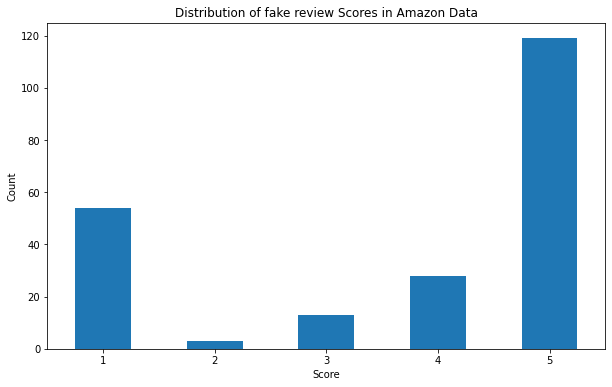

In [30]:
# Calculate the value counts for the 'Score' column
score_counts = filtered_data['Score'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.title('Distribution of fake review Scores in Amazon Data')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The bar chart shows the count of fake reviews across different scores. The highest number of fake reviews is observed at score 5, followed by score 1, indicating that fake reviews are predominantly very positive or very negative. Scores of 3 and 4 have moderate counts, while score 2 has the fewest fake reviews. This pattern suggests that fake reviews are likely used to either significantly inflate or harm product ratings.

#### 3.4.5.5 Summary associated with potantial spam profiles<a id='3.5.5.5_Summary'></a>

In [31]:
ProfileNames = ['HTBK', 'christopher hayes', 'Paul Moskowitz',
       'N. Ferguson "Two, Daisy, Hannah, and Kitten"',
       'Nicholas Walker "Savage"', 'J. Hollister "Judy says"',
       'Joe MacBu', 'Bballdude733', 'busybakers', 'FL Mom', 'Doctor D',
       'Wendy Johnston "podlogic"', 'Melissa-Kae Leacock',
       'B.O.B  AOJN "would be gourmet"', 'CatWoman',
       'Shana "That\'s my opinion- I could be wrong!"', 'Basil Nestor',
       'A. Winters "Be good humans."', 'ARA', 'A. Smith', 'Mark Bodzin',
       'Zefran', 'Sandy "WR Gma"', 'mom of 2', 'GMG "GMG"', 'Orlando Mom']

# Use .isin() to filter the DataFrame based on the ProfileNames list
filtered_data = amazon_data[amazon_data['ProfileName'].isin(ProfileNames)]

# Group by ProfileName and Score, and count the occurrences
grouped_data = filtered_data.groupby(['ProductId','Summary', 'Score']).size().reset_index(name='Count').sort_values(by=['Count', 'ProductId', 'Score'], ascending=[False, False, False])

# Print the grouped data
grouped_data.head(28)

,ProductId,Summary,Score,Count
156,B003WK0D8O,"Filler food is empty, leaves your cat always n...",1,4
151,B003MWBFXY,"Filler food is empty, leaves your cat always n...",1,4
110,B001VIYCK4,"Filler food is empty, leaves your cat always n...",1,4
177,B009GHI5Q4,"Filler food is empty, leaves your cat always n...",1,3
176,B009B87SAC,"Filler food is empty, leaves your cat always n...",1,3
150,B003MWBFMK,"Filler food is empty, leaves your cat always n...",1,3
60,B000WFU8O6,Fantastic Food for Good Cat Health,5,3
51,B000QSN7P6,"Filler food is empty, leaves your cat always n...",1,3
148,B003MA8P02,"Filler food is empty, leaves your cat always n...",1,2
147,B003M60K54,"Filler food is empty, leaves your cat always n...",1,2


This pattern suggests potential review manipulation or fake reviews, as identical summaries and scores are unlikely to occur naturally across different products. Additionally, it seems all the products are related to the same category, which appears to be 'Cat food'.

#### 3.4.5.6 Reviews associated with potantial spam profiles<a id='3.5.5.6_Profiles'></a>

In [32]:
spam_reviews = amazon_data[amazon_data['ProfileName'].isin(ProfileNames)]
spam_reviews.head()

In [ ]:
spam_reviews.shape

#### 3.4.5.7 Word Cloud of Review Text<a id='3.5.5.7_Word'></a>

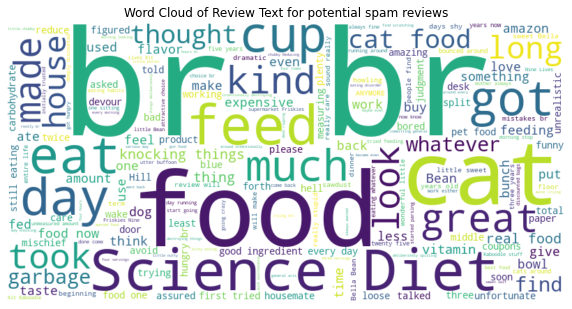

In [33]:
from wordcloud import WordCloud

# Combine all review texts
text_combined = ' '.join(spam_reviews['Text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text for potential spam reviews')
plt.show()

The attached image shows a word cloud generated from review texts identified as potential spam. Key words such as "feed", "cat", "food", "great", "Science", "Diet", and "find" dominate the word cloud, indicating frequent mentions. These reviews appear to focus on pet food, specifically cat food, with mixed sentiments about product quality. The repetition of words and phrases suggests automated or copied content, which is common in spam reviews.

#### 3.4.5.8 Sentiment Analysis - Potential Spam<a id='3.5.5.8_Sentiment'></a>

C:\Users\armeh\AppData\Local\Temp\ipykernel_6488\1792517323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_reviews['Sentiment'] = spam_reviews['Text'].apply(get_sentiment)


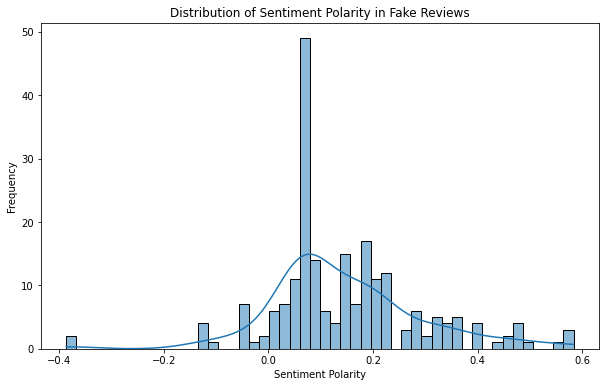

In [34]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
spam_reviews['Sentiment'] = spam_reviews['Text'].apply(get_sentiment)

# Plotting sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(spam_reviews['Sentiment'], bins=50, kde=True)
plt.title('Distribution of Sentiment Polarity in Fake Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

The histogram titled "Distribution of Sentiment Polarity in Fake Reviews" shows the frequency of sentiment polarity scores within fake reviews. The data reveals a significant concentration of reviews around a neutral polarity score of 0, indicating many fake reviews have neutral sentiment. While the sentiment polarity ranges from -0.4 to 0.6, most reviews are neutral or slightly positive, with fewer reviews exhibiting extreme sentiments. This suggests that fake reviews often aim to appear balanced or slightly favorable, potentially to avoid detection by sentiment analysis algorithms.

#### 3.4.5.9 Analysis of Review Length and Score<a id='3.5.5.9_Length'></a>

C:\Users\armeh\AppData\Local\Temp\ipykernel_6488\2048170482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_reviews['TextLength'] = spam_reviews['Text'].apply(len)


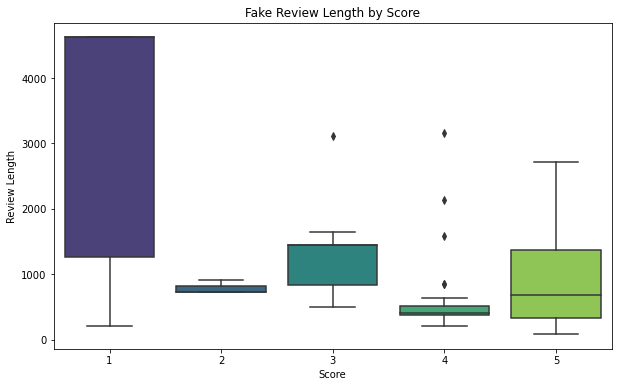

In [35]:
# Assuming spam_reviews is your DataFrame and it has a 'Text' column
# Calculate the length of each review
spam_reviews['TextLength'] = spam_reviews['Text'].apply(len)

# Plotting review length vs. score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='TextLength', data=spam_reviews, palette='viridis')
plt.title('Fake Review Length by Score')
plt.xlabel('Score')
plt.ylabel('Review Length')
plt.show()

The box plot titled "Fake Review Length by Score" shows the distribution of fake review lengths across different scores. Reviews with a score of 1 have the greatest variability and longest lengths, with some reviews extending over 4000 characters. In contrast, scores of 2, 3, 4, and 5 have shorter and more consistent lengths. Score 3 reviews are relatively longer and more variable compared to scores 2 and 4, which are more compact. Score 5 reviews also show some variability but are generally shorter than score 1 reviews. This suggests that extremely negative fake reviews tend to be much longer, while other scores are associated with shorter, more uniform review lengths.

 #### 3.4.510 Most Common Words<a id='3.5.5.10_Most'></a>

In [36]:
from collections import Counter
import re

# Function to clean and tokenize text
def clean_tokenize(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    return tokens

# Tokenize all reviews and count words
all_tokens = spam_reviews['Text'].apply(clean_tokenize).sum()
word_freq = Counter(all_tokens)

# Display the most common words
print(word_freq.most_common(20))

[('the', 2049), ('a', 1722), ('br', 1421), ('and', 1410), ('i', 1270), ('to', 1215), ('it', 1188), ('of', 1185), ('she', 1158), ('in', 869), ('for', 867), ('food', 857), ('was', 838), ('is', 747), ('that', 711), ('her', 614), ('but', 556), ('s', 540), ('so', 518), ('this', 463)]


### 3.6 Duplicate Records<a id='3.6_Duplicate_Records'></a>

In [37]:
# List of columns to check for duplicates, excluding 'Id'
columns_no_id = [col for col in amazon_data.columns if col != 'Id']

# Check for duplicate records based on all columns except 'Id'
duplicate_records = amazon_data[amazon_data.duplicated(subset=columns_no_id, keep=False)]

duplicate_records.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,ReviewTime,CleanedText,CleanedSummary,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary,StemmedSummary,StemmedText,FakeReviews
4094,170487,B000MXEN9O,A3O0VDZUOJPZWX,Orlando Mom,0,0,5,1313020800,Best price anywhere!,My little one loves these and you cannot beat ...,...,2011-08-11,my little one loves these and you cannot beat ...,best price anywhere,"['little', 'one', 'loves', 'beat', 'subscribe'...","['best', 'price', 'anywhere']","['little', 'one', 'love', 'beat', 'subscribe',...","['best', 'price', 'anywhere']",best price anywher !,my littl one love these and you can not beat t...,0.0
6039,81059,B000MXHQW0,AO29VDV2AUM6W,Desiree Calora,0,0,5,1319068800,Great baby food,"This is great for your little one, no artifici...",...,2011-10-20,this is great for your little one no artificia...,great baby food,"['great', 'little', 'one', 'artificial', 'flav...","['great', 'baby', 'food']","['great', 'little', 'one', 'artificial', 'flav...","['great', 'baby', 'food']",great babi food,"thi is great for your littl one , no artifici ...",0.0
14961,325099,B0002DGRRA,AJD41FBJD9010,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""",0,0,5,1233360000,best dog treat-- great for training--- all do...,Freeze dried liver has a hypnotic effect on do...,...,2009-01-31,freeze dried liver has a hypnotic effect on do...,best dog treat great for training all dogs lo...,"['freeze', 'dried', 'liver', 'hypnotic', 'effe...","['best', 'dog', 'treat', 'great', 'training', ...","['freeze', 'dried', 'liver', 'hypnotic', 'effe...","['best', 'dog', 'treat', 'great', 'training', ...",best dog treat -- great for train -- - all dog...,freez dri liver ha a hypnot effect on dog . th...,0.0
19606,170485,B000MXEN9O,A3O0VDZUOJPZWX,Orlando Mom,0,0,5,1313020800,Best price anywhere!,My little one loves these and you cannot beat ...,...,2011-08-11,my little one loves these and you cannot beat ...,best price anywhere,"['little', 'one', 'loves', 'beat', 'subscribe'...","['best', 'price', 'anywhere']","['little', 'one', 'love', 'beat', 'subscribe',...","['best', 'price', 'anywhere']",best price anywher !,my littl one love these and you can not beat t...,0.0
22231,255268,B0029NVJX8,A3LCQXQ4SFYBAU,Johna Jane,0,0,5,1345420800,Cat's favorite,These treats are my picky cat's favorite. I'v...,...,2012-08-20,these treats are my picky cats favorite ive t...,cats favorite,"['treats', 'picky', 'cats', 'favorite', 'ive',...","['cats', 'favorite']","['treat', 'picky', 'cat', 'favorite', 'ive', '...","['cat', 'favorite']",cat 's favorit,these treat are my picki cat 's favorit . i 'v...,0.0


In [38]:
duplicate_records.shape

(26, 21)

There are 26 duplicate records.

## 3.7 Missing Values<a id='3.7_MissingValues'></a>

In [39]:
# Check for missing values
missing_values = amazon_data.isnull().sum()
print(missing_values)

Id                         0
ProductId                  0
UserId                     0
ProfileName                0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    9
Text                       0
HelpfulnessRatio           0
ReviewTime                 0
CleanedText                0
CleanedSummary            46
TokenizedText              0
TokenizedSummary           0
LemmatizedText             0
LemmatizedSummary          0
StemmedSummary             9
StemmedText                0
FakeReviews                0
dtype: int64


There are no missing values in the dataset.

## 3.8 Basic Text Statistics<a id='3.8_Statistics'></a>

In [40]:
# Calculate basic statistics for the 'Text' column
amazon_data['TextLength'] = amazon_data['Text'].apply(len)
amazon_data['WordCount'] = amazon_data['Text'].apply(lambda x: len(x.split()))

# Display basic statistics
print(amazon_data[['TextLength', 'WordCount']].describe())

          TextLength      WordCount
count  100000.000000  100000.000000
mean      436.306800      80.260440
std       445.663953      79.598471
min        30.000000       4.000000
25%       179.000000      33.000000
50%       301.000000      56.000000
75%       528.000000      98.000000
max     11321.000000    1901.000000


The summary statistics table provides an overview of the TextLength and WordCount for 100,000 reviews. On average, reviews have a text length of 436 characters and contain 80 words. The standard deviation indicates significant variability in both text length (445 characters) and word count (79 words). The minimum values for text length and word count are 30 characters and 4 words, respectively, while the maximum values reach 11,321 characters and 1,901 words. The interquartile range (IQR) shows that the middle 50% of reviews have text lengths between 179 and 528 characters and word counts between 33 and 98 words, highlighting a wide range of review lengths and word counts.

## 3.9 Word Cloud of Review Text<a id='3.9_Cloud'></a>

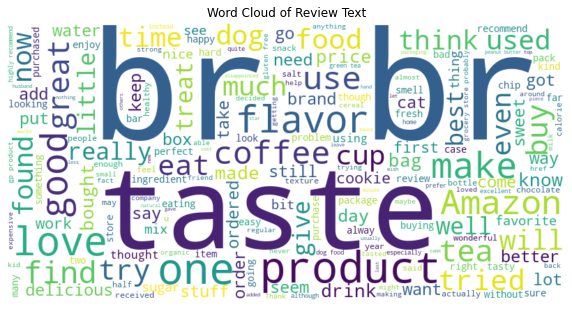

In [41]:
from wordcloud import WordCloud

# Combine all review texts
text_combined = ' '.join(amazon_data['Text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text')
plt.show()

The word cloud generated from Amazon product reviews highlights key themes and sentiments expressed by customers. Prominent words like "product", "taste", "love", "make", and "buy" indicate a strong focus on product quality, particularly regarding taste and flavor. The frequent appearance of positive terms such as "good", "great", and "best" reflects overall customer satisfaction. Additionally, the mention of specific items like "coffee", "tea", and "dog" suggests these categories are commonly reviewed. This word cloud provides valuable insights into customer priorities and sentiments, which can be leveraged for product improvement and targeted marketing strategies.

## 3.10 Sentiment Analysis<a id='3.10_SentimentAnalysis'></a>

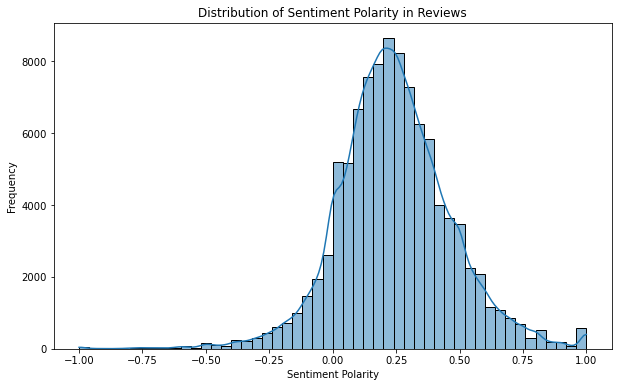

In [42]:
#from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
amazon_data['Sentiment'] = amazon_data['Text'].apply(get_sentiment)

# Plotting sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(amazon_data['Sentiment'], bins=50, kde=True)
plt.title('Distribution of Sentiment Polarity in Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

The histogram titled "Distribution of Sentiment Polarity in Reviews" illustrates the frequency of various sentiment polarity scores in Amazon product reviews. The majority of reviews exhibit a positive sentiment, clustering around a polarity score of 0.25, which indicates generally positive feedback from customers. There is a noticeable peak near 0, suggesting a significant number of neutral reviews. Negative sentiments are less frequent, as shown by the lower counts on the left side of the distribution. Overall, this visualization highlights that Amazon product reviews tend to skew positively, reflecting a high level of customer satisfaction.

## 3.11 Analysis of Review Length and Score<a id='3.11_ReviewLength'></a>

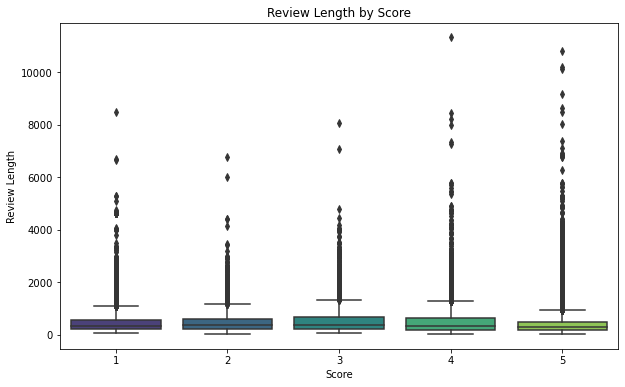

In [43]:
# Plotting review length vs. score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='TextLength', data=amazon_data, palette='viridis')
plt.title('Review Length by Score')
plt.xlabel('Score')
plt.ylabel('Review Length')
plt.show()

The box plot titled "Review Length by Score" depicts the relationship between review length and review scores on Amazon, with scores ranging from 1 to 5. The plot shows that reviews across all score categories tend to have a similar distribution in terms of length, with the majority of reviews being relatively short. However, there are noticeable outliers, particularly in reviews with scores of 1 and 5, where some reviews exceed 5,000 characters. This suggests that while most reviews are concise, a few exceptionally long reviews exist for both very positive and very negative feedback. Overall, the review length does not appear to vary significantly across different scores.

## 3.12 N-grams Analysis<a id='3.12_N_grams'></a>

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get n-grams
def get_ngrams(text, n=None):
    vectorizer = CountVectorizer(ngram_range=(n, n)).fit([text])
    return vectorizer.get_feature_names_out()

# Get bi-grams (2-grams)
bigrams = get_ngrams(text_combined, 2)
print(bigrams[:20])

# Get tri-grams (3-grams)
trigrams = get_ngrams(text_combined, 3)
print(trigrams[:20])

['00 00' '00 07' '00 11' '00 12' '00 12oz' '00 16' '00 22' '00 27' '00 30'
 '00 33oz' '00 70' '00 89' '00 about' '00 absurdity' '00 admittedly'
 '00 after' '00 all' '00 already' '00 also' '00 am']
['00 00 at' '00 00 depending' '00 00 more' '00 00 on' '00 07 oz'
 '00 11 oz' '00 12 00' '00 12oz jar' '00 16 99' '00 22 25' '00 27 00'
 '00 30 00' '00 30 experience' '00 33oz can' '00 70 yrs' '00 89 box'
 '00 about pounds' '00 absurdity think' '00 admittedly when'
 '00 after course']


The N-grams result indicates that many phrases in the reviews contain numerical values, such as '00 00', '00 12oz', '00 16', '00 30', and '00 70'. These N-grams frequently occur alongside various units of measurement and quantities, like '12oz', '33oz', '89 box', and '70 yrs'. This suggests that many reviews involve detailed product specifications or quantities, reflecting a focus on precise product descriptions. The repetition of '00' in many N-grams could be due to formatting issues or data anomalies that need to be addressed for more accurate text analysis.

## 3.13 Most Common Words<a id='3.13_N_MostCommonWords'></a>

In [45]:
from collections import Counter
import re

# Function to clean and tokenize text
def clean_tokenize(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    return tokens

# Tokenize all reviews and count words
all_tokens = amazon_data['Text'].apply(clean_tokenize).sum()
word_freq = Counter(all_tokens)

# Display the most common words
print(word_freq.most_common(20))

[('the', 329377), ('i', 297494), ('and', 227191), ('a', 217367), ('it', 188032), ('to', 178743), ('of', 141238), ('is', 128401), ('this', 118088), ('br', 114755), ('for', 96936), ('in', 96529), ('my', 81800), ('that', 79924), ('but', 65993), ('you', 64757), ('with', 62059), ('have', 60665), ('not', 58715), ('are', 56226)]


## 3.14 Saving the Cleaned Data<a id='3.14_Save'></a>

In [46]:
# Save the cleaned data to a new CSV file
amazon_data.to_csv('amazon_data_eda.csv', index=False)

## 3.15 Summary<a id='3.15_Summary'></a>

This notebook performed a comprehensive exploratory data analysis (EDA) on the Amazon Fine Food Reviews dataset to uncover key patterns and insights. The analysis began with loading the dataset and exploring features such as ProductId, ProfileName, Score, and ReviewTime. The distribution of scores revealed a majority of highly positive reviews, with a significant number scoring 5. A time series analysis indicated a substantial increase in review volume after 2006, reflecting the platform's growing popularity. Review lengths were generally concise, though outliers were present, especially for scores of 1 and 5.

The analysis also focused on identifying potential spam reviews, highlighting profiles like 'Christopher Hayes' that exhibited suspicious activities, such as posting multiple reviews on the same day. Sentiment analysis revealed that many fake reviews have neutral or slightly positive sentiments, potentially to evade detection. Data visualizations, including histograms, box plots, and word clouds, illustrated the distribution of review lengths, sentiment polarity, and common words used in the reviews. The N-grams analysis showed frequent occurrences of numerical values and measurements, indicating a focus on detailed product descriptions. This EDA provided valuable insights into customer behavior, review patterns, and potential spam activities, which can be leveraged to improve product offerings and ensure the integrity of review data on the platform.